In [5]:
# !pip install pandas
!pip install tensorflow==1.8

  Using cached https://files.pythonhosted.org/packages/22/c6/d08f7c549330c2acc1b18b5c1f0f8d9d2af92f54d56861f331f372731671/tensorflow-1.8.0-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/65/75/8b706e1170e2c7b6242b1675259e47986bb4fc490f29387989a965972e6e/grpcio-1.44.0.tar.gz
  Running setup.py bdist_wheel for grpcio ... done
  Stored in directory: /home/ashwin/.cache/pip/wheels/1e/60/b5/d8c8372c2015aba94390cfacfe54d1320d6e4a98f81129c1c4
Successfully built grpcio


In [10]:
!pip install keras==2.2.1

    100% |████████████████████████████████| 307kB 723kB/s ta 0:00:01
  Cache entry deserialization failed, entry ignored
  Cache entry deserialization failed, entry ignored
  Cache entry deserialization failed, entry ignored
    100% |████████████████████████████████| 4.0MB 137kB/s ta 0:00:01
  Cache entry deserialization failed, entry ignored
  Cache entry deserialization failed, entry ignored
    100% |████████████████████████████████| 604kB 718kB/s ta 0:00:01
    100% |████████████████████████████████| 51kB 1.1MB/s ta 0:00:01
  Cache entry deserialization failed, entry ignored
  Cache entry deserialization failed, entry ignored
  Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0


In [1]:
import re
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import keras
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import math
import nltk

Using TensorFlow backend.
/home/ashwin/Final year project/venv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/ashwin/Final year project/venv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:520: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/ashwin/Final year project/venv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:521: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/ashwin/F

## Analysis of Dataset
Here we go through the total number of dataset present

In [51]:
data = pd.read_csv('IMDB Dataset.csv')

In [52]:
data.shape

(77293, 2)

In [53]:
data

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
77288,My GrandMa is making Dinenr with my Mum,positive
77289,Mid-morning snack time... A bowl of cheese noo...,positive
77290,@ShaDeLa same here say it like from the Termi...,positive
77291,@DestinyHope92 im great thaanks wbuu?,positive


## Installation of required packages for visualisation

In [8]:
!pip install matplotlib

  Using cached https://files.pythonhosted.org/packages/09/03/b7b30fa81cb687d1178e085d0f01111ceaea3bf81f9330c937fb6f6c8ca0/matplotlib-3.3.4-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/7d/2a/2fc11b54e2742db06297f7fa7f420a0e3069fdcf0e4b57dfec33f0b08622/Pillow-8.4.0.tar.gz
  Using cached https://files.pythonhosted.org/packages/80/c1/23fd82ad3121656b585351aba6c19761926bb0db2ebed9e4ff09a43a3fcc/pyparsing-3.0.7-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/a7/1b/cbd8ae738719b5f41592a12057ef5442e2ed5f5cb5451f8fc7e9f8875a1a/kiwisolver-1.3.1-cp36-cp36m-manylinux1_x86_64.whl
  Running setup.py bdist_wheel for pillow ... error
  Complete output from command "/home/ashwin/Final year project/venv/bin/python3" -u -c "import setuptools, tokenize;__file__='/tmp/pip-build-a7hfggjx/pillow/setup.py';f=getattr(tokenize, 'open', open)(__file__);code=f.read().replace('\r\n', '\n');f.close();exec(compile(code, __file__, 'exec'))" bdist_whee

Failed to build pillow
  Running setup.py install for pillow ... error
    Complete output from command "/home/ashwin/Final year project/venv/bin/python3" -u -c "import setuptools, tokenize;__file__='/tmp/pip-build-a7hfggjx/pillow/setup.py';f=getattr(tokenize, 'open', open)(__file__);code=f.read().replace('\r\n', '\n');f.close();exec(compile(code, __file__, 'exec'))" install --record /tmp/pip-6lomxp5t-record/install-record.txt --single-version-externally-managed --compile --install-headers "/home/ashwin/Final year project/venv/include/site/python3.6/pillow":
    /usr/lib/python3.6/distutils/dist.py:261: UserWarning: Unknown distribution option: 'long_description_content_type'
      warnings.warn(msg)
    running install
    running build
    running build_py
    creating build
    creating build/lib.linux-x86_64-3.6
    creating build/lib.linux-x86_64-3.6/PIL
    copying src/PIL/ImagePath.py -> build/lib.linux-x86_64-3.6/PIL
    copying src/PIL/ImageStat.py -> build/lib.linux-x86_64-3.

Command ""/home/ashwin/Final year project/venv/bin/python3" -u -c "import setuptools, tokenize;__file__='/tmp/pip-build-a7hfggjx/pillow/setup.py';f=getattr(tokenize, 'open', open)(__file__);code=f.read().replace('\r\n', '\n');f.close();exec(compile(code, __file__, 'exec'))" install --record /tmp/pip-6lomxp5t-record/install-record.txt --single-version-externally-managed --compile --install-headers "/home/ashwin/Final year project/venv/include/site/python3.6/pillow"" failed with error code 1 in /tmp/pip-build-a7hfggjx/pillow/


In [54]:
c=0
for i in range(len(data)):
    if(data.sentiment[i]=="positive"):
        c=c+1
n=len(data)-c

In [55]:
data

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
77288,My GrandMa is making Dinenr with my Mum,positive
77289,Mid-morning snack time... A bowl of cheese noo...,positive
77290,@ShaDeLa same here say it like from the Termi...,positive
77291,@DestinyHope92 im great thaanks wbuu?,positive


In [59]:
data

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. <br /><br />the...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive
...,...,...
77288,my grandma is making dinenr with my mum,positive
77289,mid-morning snack time... a bowl of cheese noo...,positive
77290,@shadela same here say it like from the termi...,positive
77291,@destinyhope im great thaanks wbuu?,positive


In [12]:
!python -m pip install --upgrade pip
!python -m pip install --upgrade pillow

Cache entry deserialization failed, entry ignored
  Using cached https://files.pythonhosted.org/packages/a4/6d/6463d49a933f547439d6b5b98b46af8742cc03ae83543e4d7688c2420f8b/pip-21.3.1-py3-none-any.whl
  Found existing installation: pip 9.0.1
    Uninstalling pip-9.0.1:
      Successfully uninstalled pip-9.0.1
  Using cached Pillow-8.4.0-cp36-cp36m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.1 MB)


In [14]:
!pip install matplotlib

  Using cached matplotlib-3.3.4-cp36-cp36m-manylinux1_x86_64.whl (11.5 MB)


In [15]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

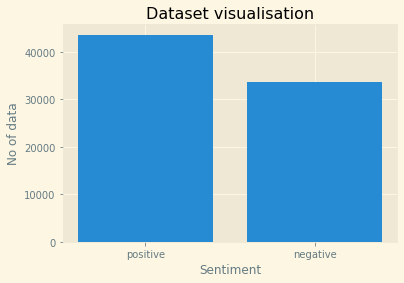

In [56]:
x = ['positive','negative']
y = [c,n]
plt.style.use('Solarize_Light2')
plt.bar(x, y)
plt.title('Dataset visualisation')
plt.xlabel('Sentiment')
plt.ylabel('No of data')

plt.show()

# Data Preprocessing

First, we need to remove HTML tags, URLs, and non-alphanumeric characters from the reviews. We do that with the help of the remove_tags function, and Regex functions are used for easy string manipulation.

In [65]:
def remove_tags(string):
    removelist = ""
    result = re.sub('','',string)          #remove HTML tags
    result = re.sub('https://.*','',result)   #remove URLs
#     result = re.sub(r'[^w'+removelist+']', ' ',result)    #remove non-alphanumeric characters 
    result = result.lower()
    re_html=re.compile(r'<[^>]+>')
    re_html.sub('',result)
    result = re.sub(r'\d+', '', result)
    return result
data['review']=data['review'].apply(lambda cw : remove_tags(cw))

In [66]:
data

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. <br /><br />the...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive
...,...,...
77288,my grandma is making dinenr with my mum,positive
77289,mid-morning snack time... a bowl of cheese noo...,positive
77290,@shadela same here say it like from the termi...,positive
77291,@destinyhope im great thaanks wbuu?,positive


### Removing html tags 

In [69]:
for i in range(len(data)):    
    re_html=re.compile(r'<[^>]+>')
    data['review'][i]=re_html.sub('',data.review[i])
    

In [70]:
data

,review,sentiment
0,one reviewer mentioned watching oz episode hoo...,positive
1,wonderful little production. the filming techn...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically there's family little boy (jake) thi...,negative
4,"petter mattei's ""love time money"" visually stu...",positive
...,...,...
77288,grandma making dinenr mum,positive
77289,mid-morning snack time... bowl cheese noodles....,positive
77290,@shadela say like terminiator movies. come lik...,positive
77291,@destinyhope im great thaanks wbuu?,positive


## Remove non-alphanumeric characters 

In [74]:
for i in range(len(data)):
    words = [word for word in data.review[i].split() if word.isalpha()]
    data['review'][i] = ' '.join(words)

In [75]:
data

,review,sentiment
0,one reviewer mentioned watching oz episode exa...,positive
1,wonderful little the filming technique fashion...,positive
2,thought wonderful way spend time hot summer si...,positive
3,basically family little boy think zombie close...,negative
4,petter time visually stunning film mattei offe...,positive
...,...,...
77288,grandma making dinenr mum,positive
77289,snack bowl cheese,positive
77290,say like terminiator come like,positive
77291,im great thaanks,positive


### We also need to remove stopwords from the corpus. Stopwords are commonly used words like ‘and’, ‘the’, ‘at’ that do not add any special meaning or significance to a sentence

In [67]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
data['review'] = data['review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

[nltk_data] Downloading package stopwords to /home/ashwin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

## Lemmatization

In [76]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()
def lemmatize_text(text):
    st = ""
    for w in w_tokenizer.tokenize(text):
        st = st + lemmatizer.lemmatize(w) + " "
    return st
data['review'] = data.review.apply(lemmatize_text)
data

,review,sentiment
0,one reviewer mentioned watching oz episode exa...,positive
1,wonderful little the filming technique fashion...,positive
2,thought wonderful way spend time hot summer si...,positive
3,basically family little boy think zombie close...,negative
4,petter time visually stunning film mattei offe...,positive
...,...,...
77288,grandma making dinenr mum,positive
77289,snack bowl cheese,positive
77290,say like terminiator come like,positive
77291,im great thaanks,positive


In [78]:
s = 0.0
for i in data['review']:
    word_list = i.split()
    s = s + len(word_list)
print("Average length of each review : ",s/data.shape[0])
pos = 0
for i in range(data.shape[0]):
    if data.iloc[i]['sentiment'] == 'positive':
        pos = pos + 1
neg = data.shape[0]-pos
print("Percentage of reviews with positive sentiment is "+str(pos/data.shape[0]*100)+"%")
print("Percentage of reviews with negative sentiment is "+str(neg/data.shape[0]*100)+"%")
# >>Average length of each review :  119.57112
# >>Percentage of reviews with positive sentiment is 50.0%
# >>Percentage of reviews with negative sentiment is 50.0%

Average length of each review :  57.0351390164698
Percentage of reviews with positive sentiment is 56.459187766033146%
Percentage of reviews with negative sentiment is 43.540812233966854%


In [79]:
!pip freeze

absl-py==1.0.0
astor==0.8.1
backcall==0.2.0
bleach==1.5.0
cached-property==1.5.2
certifi==2021.10.8
charset-normalizer==2.0.12
click==8.0.4
cycler==0.11.0
dataclasses==0.8
decorator==5.1.1
entrypoints==0.4
gast==0.5.3
grpcio==1.44.0
h5py==3.1.0
html5lib==0.9999999
idna==3.3
importlib-metadata==4.8.3
importlib-resources==5.4.0
ipykernel==5.5.6
ipython==7.16.3
ipython-genutils==0.2.0
jedi==0.17.2
joblib==1.1.0
jupyter-client==7.1.2
jupyter-core==4.9.2
Keras==2.2.1
Keras-Applications==1.0.4
Keras-Preprocessing==1.0.2
kiwisolver==1.3.1
Markdown==3.3.6
matplotlib==3.3.4
nest-asyncio==1.5.4
nltk==3.6.7
numpy==1.19.5
oauthlib==3.2.0
pandas==1.1.5
parso==0.7.1
pexpect==4.8.0
pickleshare==0.7.5
Pillow==8.4.0
pkg_resources==0.0.0
prompt-toolkit==3.0.28
protobuf==3.19.4
ptyprocess==0.7.0
Pygments==2.11.2
pyparsing==3.0.7
python-dateutil==2.8.2
pytz==2021.3
PyYAML==6.0
pyzmq==22.3.0
regex==2022.3.2
requests==2.27.1
requests-oauthlib==1.3.1
scikit-learn==0.24.2
scipy==1.5.4
six==1.16.0
sklearn==0.0